In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,  accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load file

In [40]:
from joblib import load, dump
X_test = load('./data/X_test.pkl')
y_test = load('./data/y_test.pkl')
X_train_smote_enn = load('./data/X_train_smote_enn.pkl')
y_train_smote_enn = load('./data/y_train_smote_enn.pkl')

In [41]:
def evaluate_model(model_name, y_test, y_pred, y_pred_proba):
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    return roc_auc_score(y_test, y_pred_proba)

# Naive Bayes

In [42]:

model_NB = GaussianNB()
model_NB.fit(X_train_smote_enn, y_train_smote_enn)
y_pred_NB = model_NB.predict(X_test)
y_pred_proba_NB = model_NB.predict_proba(X_test)[:, 1]

In [44]:
dump(model_NB, './model/model_NB.pkl')

['./model/model_NB.pkl']

# KNN

In [45]:


model_KNN = KNeighborsClassifier(n_neighbors=3, weights='distance')
model_KNN.fit(X_train_smote_enn, y_train_smote_enn)
y_pred_KNN = model_KNN.predict(X_test)
y_pred_proba_KNN = model_KNN.predict_proba(X_test)[:, 1]

In [47]:
dump(model_KNN, './model/model_KNN.pkl')

['./model/model_KNN.pkl']

# Logictics regression

In [48]:
model_logistics = LogisticRegression(
    penalty='l2',
    C=10,
    solver='liblinear',
    max_iter=300,
    random_state=42
)
model_logistics.fit(X_train_smote_enn, y_train_smote_enn)
y_pred_logictics = model_logistics.predict(X_test)
y_pred_proba_logictics = model_logistics.predict_proba(X_test)[:, 1]

In [50]:
dump(model_logistics, './model/model_logictics.pkl')

['./model/model_logictics.pkl']

# Load model and predict

## Naive Bayes

In [60]:
model_NB = load('./model/model_NB.pkl')
y_pred_NB = model_NB.predict(X_test)
y_pred_proba_NB = model_NB.predict_proba(X_test)[:, 1]
accuracy_NB = evaluate_model("NB", y_test, y_pred_NB, y_pred_proba_NB)


Model: NB
Confusion Matrix:
[[83234  2061]
 [   25   123]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.83      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.90      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy: 0.9756
ROC-AUC Score: 0.9547


## KNN

In [61]:
model_KNN = load('./model/model_KNN.pkl')
y_pred_KNN = model_KNN.predict(X_test)
y_pred_proba_KNN = model_KNN.predict_proba(X_test)[:, 1]
accuracy_KNN = evaluate_model("KNN", y_test, y_pred_KNN, y_pred_proba_KNN)


Model: KNN
Confusion Matrix:
[[85156   139]
 [   25   123]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.47      0.83      0.60       148

    accuracy                           1.00     85443
   macro avg       0.73      0.91      0.80     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9981
ROC-AUC Score: 0.9149


## Logictics

In [62]:
model_logistics = load('./model/model_logictics.pkl')
y_pred_logictics = model_logistics.predict(X_test)
y_pred_proba_logictics = model_logistics.predict_proba(X_test)[:, 1]
accuracy_logistics = evaluate_model("Logictics", y_test, y_pred_logictics, y_pred_proba_logictics)


Model: Logictics
Confusion Matrix:
[[83262  2033]
 [   18   130]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy: 0.9760
ROC-AUC Score: 0.9663


# Plot

In [63]:
accuracies = [accuracy_NB, accuracy_KNN, accuracy_logistics]
model_names = ['Naive Bayes', 'KNN', 'Logistic Regression']

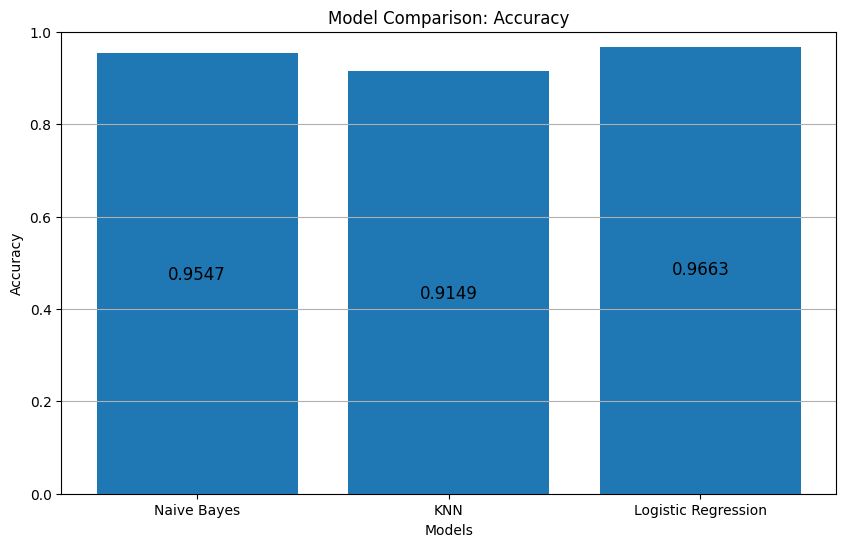

In [65]:
def plot_model_comparison(model_names, accuracies):
    plt.figure(figsize=(10, 6))
    
    # Vẽ biểu đồ cột
    bars = plt.bar(model_names, accuracies)
    
    # Thêm thông số phía trên mỗi cột
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval-0.5, f'{yval:.4f}', ha='center', va='bottom', fontsize=12)

    # Thêm tiêu đề và nhãn
    plt.title('Model Comparison: Accuracy')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.tight_layout()
    
    plt.show()

# Gọi hàm để vẽ biểu đồ
plot_model_comparison(model_names, accuracies)

# Matrix

In [66]:

def matrix(model_name,y_test,y_pred, y_pred_proba):
        # Vẽ confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f"ROC-AUC Score {model_name}: {roc_auc_score(y_test, y_pred_proba):.4f}")

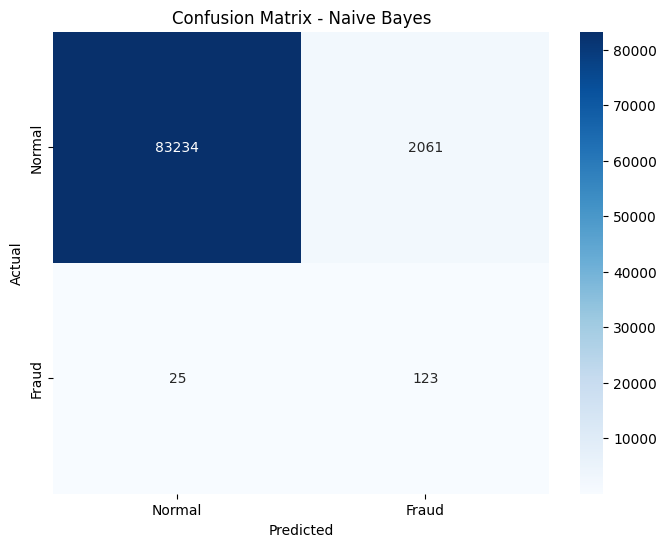

ROC-AUC Score Naive Bayes: 0.9547


In [67]:
matrix("Naive Bayes", y_test,y_pred_NB, y_pred_proba_NB)

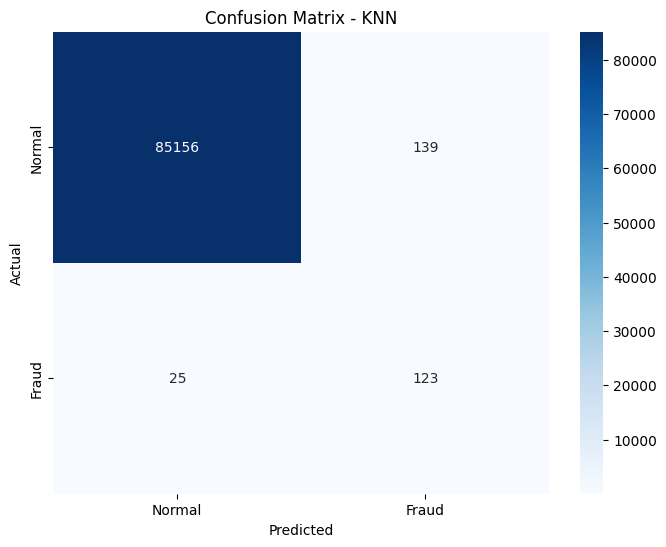

ROC-AUC Score KNN: 0.9149


In [68]:
matrix("KNN", y_test, y_pred_KNN,y_pred_proba_KNN)

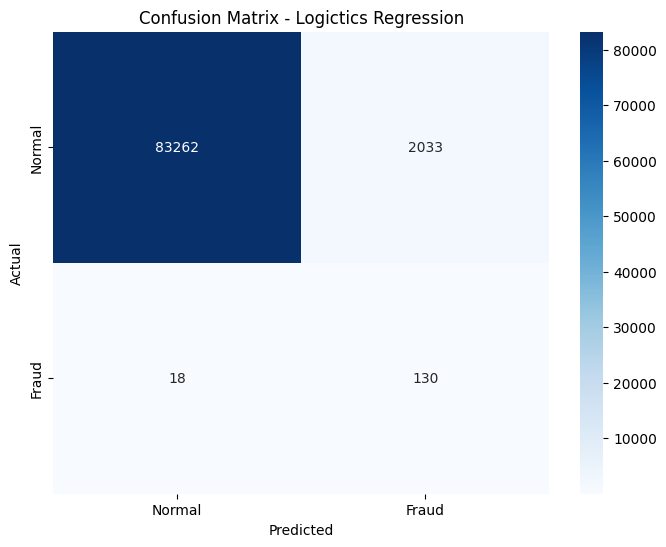

ROC-AUC Score Logictics Regression: 0.9663


In [69]:
matrix("Logictics Regression", y_test,y_pred_logictics, y_pred_proba_logictics)